## IMPORTS

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import sys
from pathlib import Path

_ = Path().resolve().parent.parent # Add [...]\MS960_MachineLearning\Projeto2 to PYTHONPATH
sys.path.insert(0, str(_))

from Projeto2.neural_network.neural import *
from Projeto2.neural_network.plots import *
from Projeto2.run import cfg

In [23]:
data_folder   = "../data/test"
data_corrects = "../data/corrects"

df_images = pd.read_csv(f"{data_folder}/images.csv", index_col=0)
df_labels = pd.read_csv(f"{data_folder}/labels.csv", index_col=0)

ratio    = pd.read_csv(f"{data_corrects}/ratio.csv", index_col=0)
cost     = pd.read_csv(f"{data_corrects}/cost.csv", index_col=0)
corrects = pd.read_csv(f"{data_corrects}/corrects.csv", index_col=0)

In [24]:
ratio

,correto
0,67.166667
1,32.833333


In [25]:
corrects

,correto,original,atribuido
image_1,1,10,10
image_10,1,10,10
image_1000,1,1,1
image_1001,1,2,2
image_1002,1,2,2
...,...,...,...
image_991,1,1,1
image_993,1,1,1
image_994,1,1,1
image_996,1,1,1


<AxesSubplot:xlabel='atribuido', ylabel='Count'>

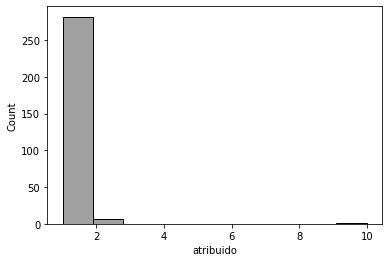

In [26]:
sns.histplot(corrects.query("original == 1")['atribuido'], color = 'grey')

In [27]:
conf_matrix = pd.DataFrame( confusion_matrix( corrects['original'], corrects['atribuido'] )  )
conf_matrix.columns = cfg.LABELS
conf_matrix.index   = conf_matrix.columns
conf_matrix.insert(0, 'true/pred', 10*['-'])
conf_matrix

,true/pred,1,2,3,4,5,6,7,8,9,10
1,-,282,6,0,0,0,0,0,0,0,1
2,-,38,220,0,3,0,0,0,0,0,67
3,-,22,192,0,2,0,0,0,1,0,92
4,-,48,30,0,183,0,0,0,0,0,42
5,-,6,126,0,5,0,0,0,0,0,157
6,-,19,175,0,0,0,0,0,0,0,98
7,-,61,19,0,160,0,0,0,0,0,41
8,-,50,223,0,7,0,0,0,1,0,30
9,-,50,28,0,177,0,0,0,0,0,34
10,-,0,5,0,0,0,0,0,0,0,299


In [18]:
_ = corrects.query("original == 4 & atribuido == 9")
df_images[_.index]

""
pixel_1
pixel_2
pixel_3
pixel_4
pixel_5
...
pixel_396
pixel_397
pixel_398
pixel_399


In [19]:
%%capture out

figs = multiple_gen_image(df_images[_.index], _, figsize=(16,16))

In [20]:
print(f"NUMBER OF PAGES: {len(figs)}")

NUMBER OF PAGES: 1
